In [ ]:
# packages and dependencies import
import pandas as pd
import seaborn as sns # Used for Exploratory Data Analysis
import numpy as np
import matplotlib
from pandas import DataFrame

# matplotlib.use('TkAgg')  # or 'QtAgg' if PyQt is installed {pip install PyQt6}
import matplotlib.pyplot as plt

In [43]:
# Data Import
data = pd.read_csv("/home/tjselevani/Desktop/Apps/vscode/python/python analysis/data/last-3-months-transactions.csv")

# Convert 'created_at' column to datetime if not already
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract time in minutes since start of the day
data.loc[:, 'minutes'] = data['created_at'].dt.hour * 60 + data['created_at'].dt.minute

# Extract time in hours since start of the day
data.loc[:, 'hours'] = data['created_at'].dt.hour

# Extract the day of the week (0 = Monday, 6 = Sunday)
data.loc[:, 'day_of_week'] = data['created_at'].dt.dayofweek

# Extract the week from 'created_at'
data.loc[:, 'week'] = data['created_at'].dt.to_period('W').astype(str)

# Extract the month from 'created_at'
data.loc[:, 'month'] = data['created_at'].dt.to_period('M').astype(str)

In [44]:
def format_minutes_xticks():
    """Returns tick positions and labels for minutes of the day."""
    return range(0, 1441, 60), [f"{h}:00" for h in range(0, 25)]

def format_hours_xticks():
    """Returns tick positions and labels for hours of the day."""
    return range(0, 25, 1), [f"{h}:00" for h in range(0, 25)]

def format_days_xticks():
    """Returns tick positions and labels for days of the week."""
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return range(len(days)), days

def format_weeks_xticks(week_labels):
    """Returns tick positions and labels for weeks."""
    return range(len(week_labels)), week_labels

def format_months_xticks(month_labels):
    """Returns tick positions and labels for months."""
    return range(len(month_labels)), month_labels

def format_years_xticks(year_labels):
    """Returns tick positions and labels for years."""
    return range(len(year_labels)), year_labels

In [45]:
# data.head()

In [46]:
# data.tail()

In [47]:
# data.shape

In [48]:
# data.columns

In [49]:
# data.describe()

In [50]:
# data.isnull().sum()

In [51]:
#Data Visualization

In [52]:
# Filter data for the specific vehicle
def get_vehicle_data(vehicle_id):
    """Returns all, credit, and debit transaction data for a given vehicle."""
    vehicle_df = data[data['vehicle_booked'] == vehicle_id].copy()
    vehicle_dt = data[data['transaction_type'] == 'CREDIT'].copy()
    
    return {
        "all": vehicle_dt,
        "credit": vehicle_df[vehicle_df['transaction_type'] == 'CREDIT'].copy(),
        "debit": vehicle_df[vehicle_df['transaction_type'] == 'DEBIT'].copy(),
    }

# Define the vehicles
vehicles = ['SM191', 'SM192', 'SM055', 'SM024', 'SM944']

# Create a dictionary to store data for all vehicles
vehicle_data_dict = {v: get_vehicle_data(v) for v in vehicles}

# Select a specific vehicle dynamically
selected_vehicle = 'SM024'  # Change this to switch vehicles

vehicle_data = vehicle_data_dict[selected_vehicle]['credit']
vehicle_revenue = vehicle_data_dict[selected_vehicle]['debit']
data = vehicle_data_dict[selected_vehicle]['all']


In [53]:
# Define unique colors for each vehicle, plus "Unknown" and "Failed Transactions"
vehicle_colors = {
    'SM191': 'blue',
    'SM192': 'green',
    'SM944': 'yellow',
    'SM055': 'purple',
    'SM024': 'orange',
    'Unknown': 'gray',
    'Failed': 'red'
}

In [54]:
# Aggregate data by month for each vehicle
monthly_by_vehicle = data.groupby(['month', 'vehicle_booked'])['amount'].sum().reset_index()

# Pivot the data to have vehicles as columns
monthly_pivot = monthly_by_vehicle.pivot(index='month', columns='vehicle_booked', values='amount').reset_index()

# Sort by month (assuming format is YYYY-MM)
monthly_pivot = monthly_pivot.sort_values('month')

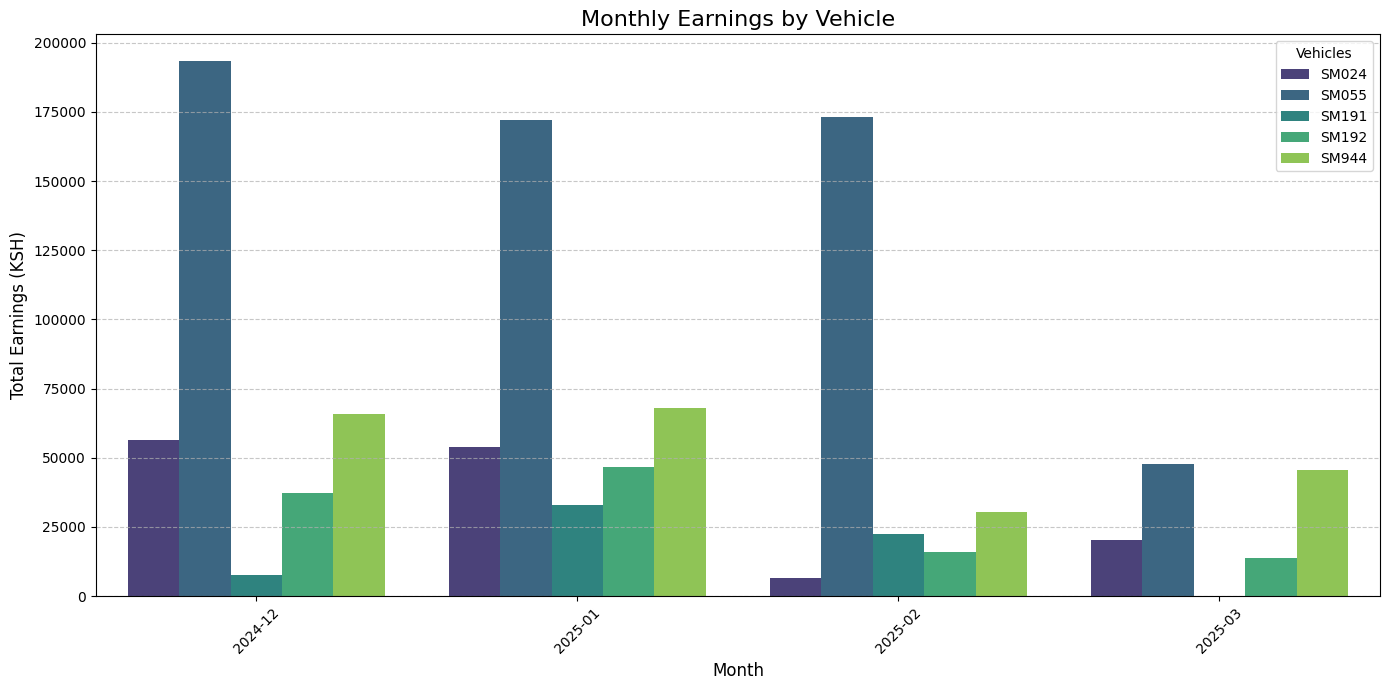

In [55]:
# VISUALIZATION 2: Bar chart for monthly earnings by vehicle
# Reshape data for grouped bar chart
monthly_melt = monthly_by_vehicle.copy()

plt.figure(figsize=(14, 7))
sns.barplot(x='month', y='amount', hue='vehicle_booked', data=monthly_melt, palette='viridis')

plt.title("Monthly Earnings by Vehicle", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_earnings_bar.png", dpi=300)
plt.show()

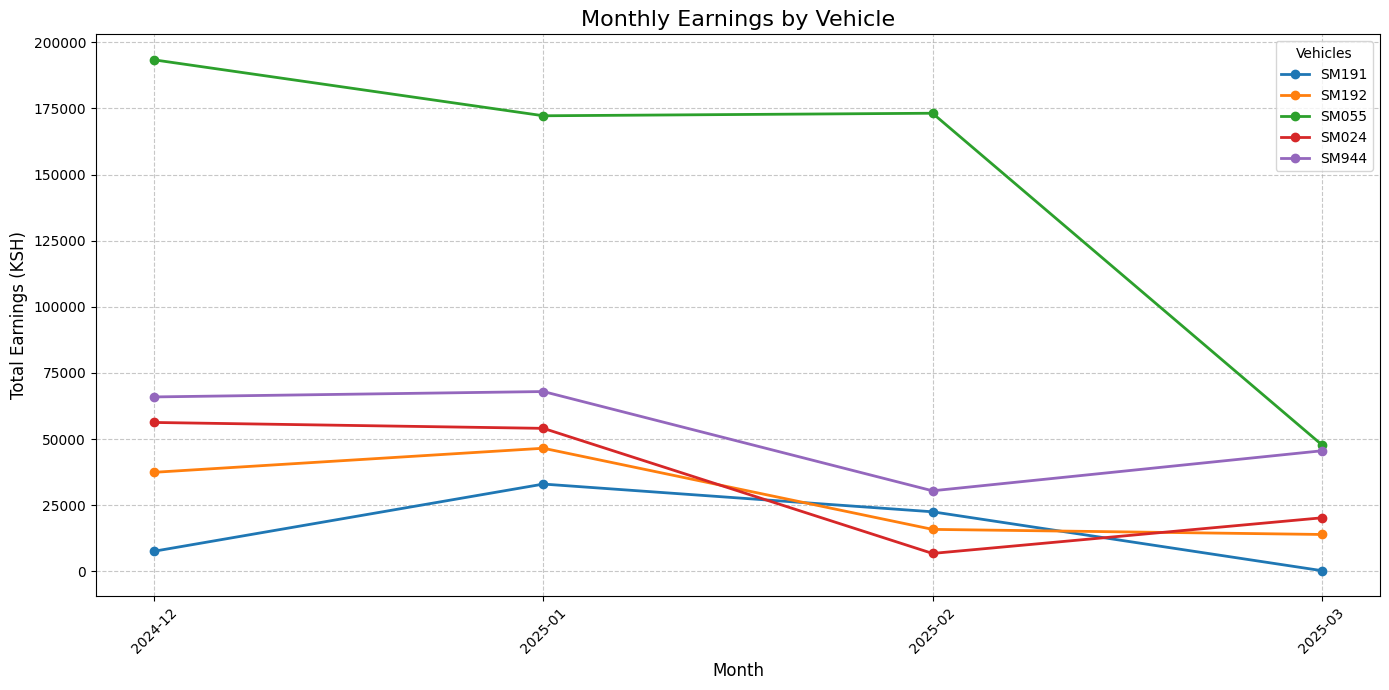

In [56]:
# VISUALIZATION 1: Line chart for monthly earnings by vehicle
plt.figure(figsize=(14, 7))
for vehicle in vehicles:
    if vehicle in monthly_pivot.columns:
        plt.plot(monthly_pivot['month'], monthly_pivot[vehicle], marker='o', linewidth=2, label=vehicle)

plt.title("Monthly Earnings by Vehicle", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_earnings_line.png", dpi=300)
plt.show()

In [57]:
# # Aggregate total fares by day and week
# daily_fares = data.groupby('day_of_week')['amount'].sum().reset_index()
# weekly_fares = data.groupby('week')['amount'].sum().reset_index()

# # Line graph for daily progression
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='day_of_week', y='amount', data=daily_fares, marker='o', label="Daily Fare")

# plt.title(f"Daily Fare Progression")
# plt.xlabel("Day")
# plt.ylabel("Total Fare")
# plt.xticks(rotation=45)
# plt.grid(True)

# plt.tight_layout()  # Adjust layout so annotations fit

# plt.show()


In [58]:
# Monthly totals for all vehicles combined
monthly_total = data.groupby('month')['amount'].sum().reset_index()
monthly_total = monthly_total.sort_values('month')

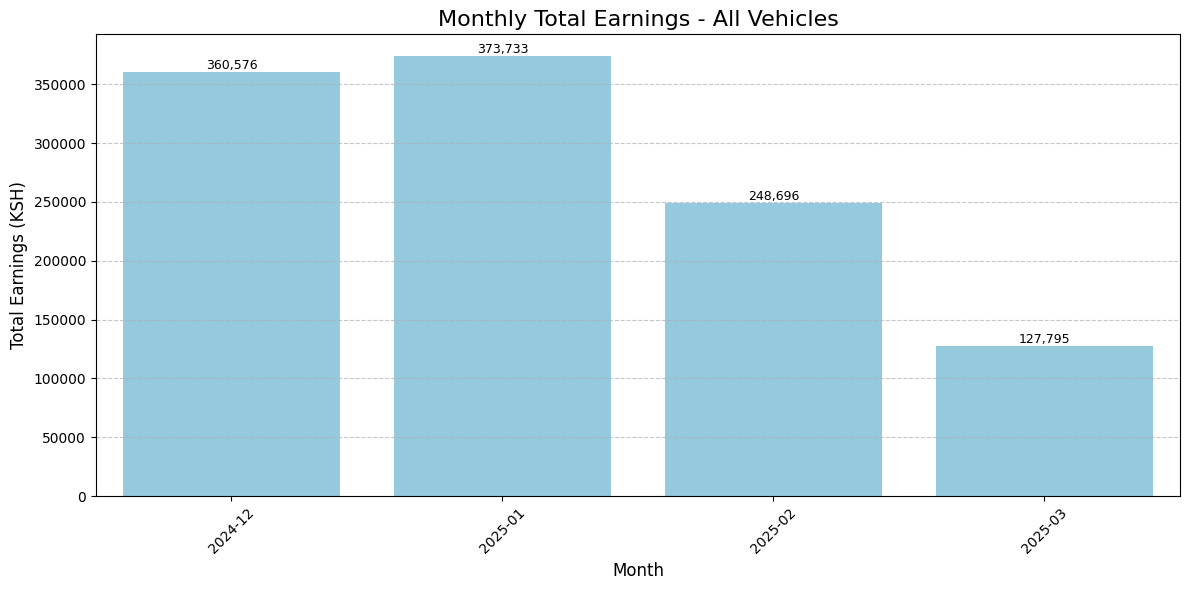

In [59]:
# VISUALIZATION 4: Monthly trends for all vehicles
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='month', y='amount', data=monthly_total, color='skyblue')

plt.title("Monthly Total Earnings - All Vehicles", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add value annotations
for i, row in monthly_total.iterrows():
    ax.text(i, row['amount'], f"{int(row['amount']):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("monthly_total_earnings.png", dpi=300)
plt.show()

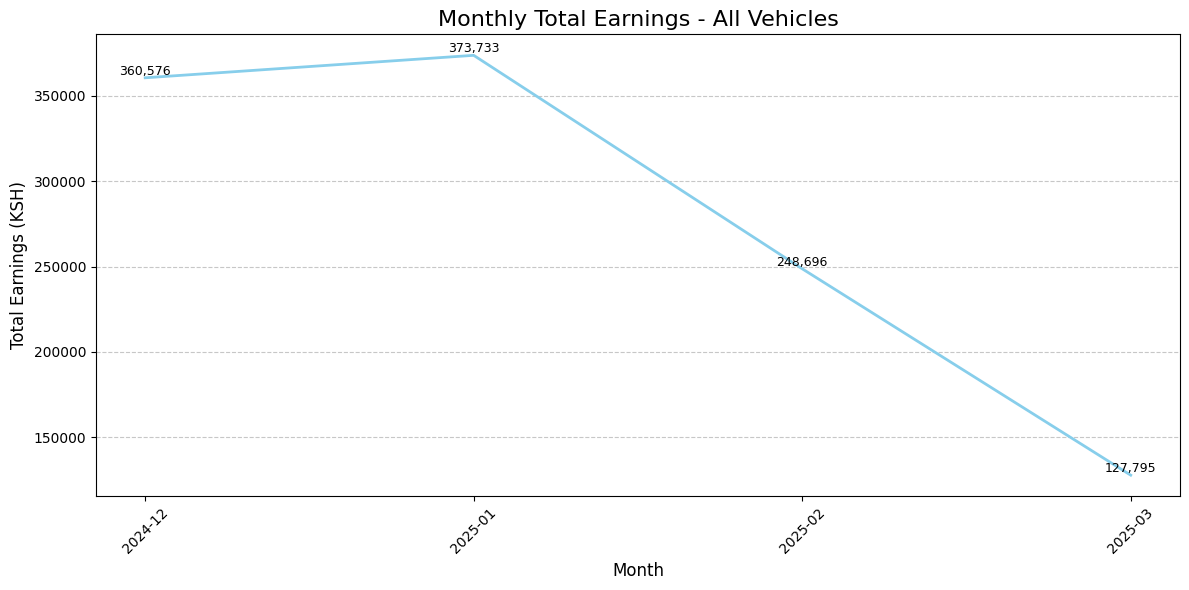

In [62]:
# VISUALIZATION 4: Monthly trends for all vehicles
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='month', y='amount', data=monthly_total, markers='o', linewidth=2, color='skyblue')

plt.title("Monthly Total Earnings - All Vehicles", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Add value annotations
for i, row in monthly_total.iterrows():
    ax.text(i, row['amount'], f"{int(row['amount']):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("monthly_total_earnings.png", dpi=300)
plt.show()

In [60]:

# # Bar graph for weekly totals
# plt.figure(figsize=(12, 6))
# sns.barplot(x='week', y='amount', data=weekly_fares, palette="coolwarm")

# plt.title(f"Weekly Total Fare")
# plt.xlabel("Week")
# plt.ylabel("Total Fare")
# plt.xticks(rotation=45)
# plt.grid(axis='y')

# # Add annotations for each bar
# for i, amount in enumerate(weekly_fares['amount']):
#     plt.text(i, amount, f"{amount}", ha='center', va='bottom')

# plt.tight_layout()  # Adjust layout so annotations fit

# plt.show()


<Figure size 1600x800 with 0 Axes>

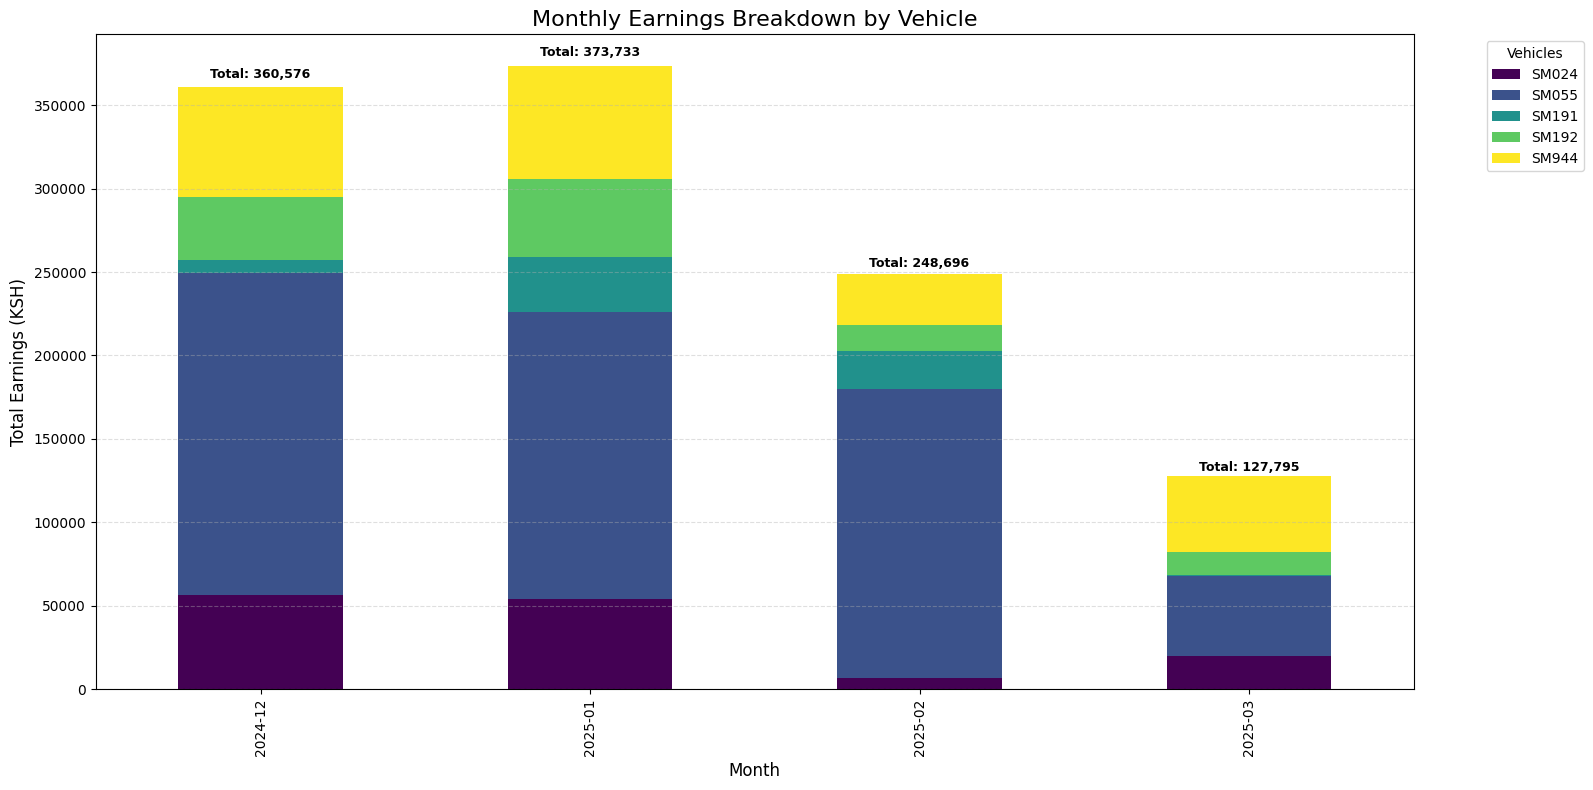

In [ ]:
# VISUALIZATION 6: Combined view showing monthly breakdown by vehicle and total
plt.figure(figsize=(16, 8))

# Create a stacked bar chart
monthly_by_vehicle_pivot = monthly_by_vehicle.pivot_table(index='month', columns='vehicle_booked', values='amount')
monthly_by_vehicle_pivot = monthly_by_vehicle_pivot.fillna(0)  # Replace NaN with 0
monthly_by_vehicle_pivot = monthly_by_vehicle_pivot.sort_index()  # Sort by month

monthly_by_vehicle_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')

plt.title("Monthly Earnings Breakdown by Vehicle", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Earnings (KSH)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Vehicles", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total value annotations
monthly_totals = monthly_by_vehicle_pivot.sum(axis=1)
for i, total in enumerate(monthly_totals):
    plt.text(i, total + (total*0.01), f"Total: {int(total):,}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
# plt.savefig("monthly_stacked_earnings.png", dpi=300)
plt.show()